In [38]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier 
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics
import time

In [39]:
wine = pd.read_csv("/Users/yangxiaonan/Downloads/winequality-red.csv")
wine.info()
#prepare the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see from the info, there are no null value.

In [40]:
X = wine.iloc[:,:11]
Y = wine.iloc[:,11]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)
#seperate the dataset into train dataset and test dataset

In [43]:
activationSet = ['identity', 'logistic', 'tanh', 'relu'] 
solverSet = ['sgd', 'adam']

for act in activationSet: 
    for solver in solverSet:
        train_score = []
        test_score = []
        layers = list(range(5,100,1)) 
        for i in layers:
            MLP = MLPClassifier(activation = act,  
                                solver = solver,
                                hidden_layer_sizes = (i,), 
                                alpha=1e-2,
                                max_iter = 1000, 
                                learning_rate_init = 0.01)
            MLP.fit(X_train,Y_train)
            train_score.append(MLP.score(X_train,Y_train))
            test_score.append(MLP.score(X_test,Y_test))

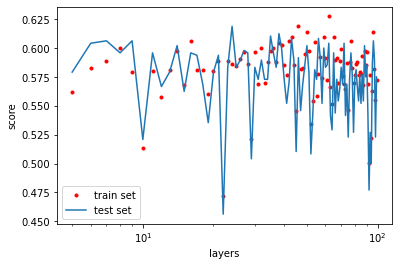

In [44]:
plt.plot(layers,train_score,'r.',label = 'train set')
plt.plot(layers,test_score,'-',label = 'test set')
plt.xlabel('layers')
plt.ylabel('score')
plt.legend()
plt.xscale("log")

In [35]:
layers[test_score.index(max(test_score))]

53

In [36]:
print("Max score",max(test_score))

Max score 0.6166666666666667


In [37]:
predict_test = MLP.predict(X_test)
f1_score(Y_test, predict_test, average='weighted', labels=np.unique(predict_test))
metrics.accuracy_score(Y_test, predict_test)

0.5166666666666667